<a href="https://colab.research.google.com/github/Laiba789/Advanced-Encryption-Standard-AES-/blob/main/Advanced_Encryption_Standard_(AES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Advanced Encryption Standard (AES)

The Advanced Encryption Standard (AES) is a symmetric block cipher chosen by the U.S. government to protect classified information. It is widely used in various applications to ensure data security.

**How AES Works:**

AES operates on data blocks of 128 bits using cryptographic keys of 128, 192, or 256 bits. It involves a series of rounds, where each round applies different transformations to the data block to achieve confusion and diffusion.

**Key Features:**

* **Security:** AES is considered highly secure and resistant to various attacks.
* **Efficiency:** It is efficient in both hardware and software implementations.
* **Flexibility:** It supports different key sizes, allowing for varying levels of security.

**In this notebook, we will explore AES encryption and decryption using the PyCryptodome library in Python.**

# Installing PyCryptodome

In [ ]:
!pip install pycryptodome


# AES Encryption and Decryption (CBC Mode)

**CBC Mode: Enhancing AES Security**

CBC mode is a technique used with AES (Advanced Encryption Standard) to make encryption even more secure. It works by chaining blocks of data together, where each block is XORed with the previous one before being encrypted. This creates a dependency between blocks, preventing attackers from manipulating or analyzing patterns in the ciphertext.

**Key Benefits:**

Stronger Security: Reduces vulnerability to certain attacks like pattern analysis.
Data Integrity: An error in one ciphertext block affects the decryption of others, providing some data integrity checks.
Parallel Decryption: Each block can be decrypted independently (once the previous block is decrypted), allowing for faster processing.
Think of it like this:

Imagine encrypting **a message as a chain**. Each link in the chain (a block of data) depends on the previous link. Changing one link affects the entire chain. This dependency makes the encryption stronger and more reliable.


In [ ]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import binascii



### Step 1: Define your plaintext message

In [ ]:
plaintext = b"AES DEMO 2025!"  # 14 bytes

### Step 2: Pad the plaintext to be a multiple of 16 bytes


In [ ]:
padded_plaintext = pad(plaintext, AES.block_size)
print(f" Padded Plaintext (hex): {binascii.hexlify(padded_plaintext).decode()}")

 Padded Plaintext (hex): 4145532044454d4f2032303235210202


### Step 3: Generate a 128-bit AES key


In [ ]:
key = get_random_bytes(16)
print(f" AES Key (hex): {binascii.hexlify(key).decode()}")

 AES Key (hex): d4e5eb29161690348d9580703a5e966c


### Step 4: Generate a random Initialization Vector (IV)

In [ ]:
iv = get_random_bytes(16)
print(f" Initialization Vector (IV) (hex): {binascii.hexlify(iv).decode()}")

 Initialization Vector (IV) (hex): 431ef5d9fa5e3b2b787a66e8249fc9a8


### Step 5: Create AES cipher object in CBC mode for encryption

In [ ]:
cipher_encrypt = AES.new(key, AES.MODE_CBC, iv)

### Step 6: Encrypt the padded plaintext


In [ ]:
ciphertext = cipher_encrypt.encrypt(padded_plaintext)
print(f" Ciphertext (hex): {binascii.hexlify(ciphertext).decode()}")

 Ciphertext (hex): 01e983dec7900a4f32ad5cd35c65f0fb


### Step 7: Create AES cipher object for decryption using same key and IV


In [ ]:
cipher_decrypt = AES.new(key, AES.MODE_CBC, iv)


### Step 8: Decrypt the ciphertext

In [ ]:
decrypted_padded_plaintext = cipher_decrypt.decrypt(ciphertext)


### Step 9: Unpad the plaintext to recover original


In [ ]:
decrypted_plaintext = unpad(decrypted_padded_plaintext, AES.block_size)
print(f" Decrypted Plaintext: {decrypted_plaintext.decode()}")

 Decrypted Plaintext: AES DEMO 2025!


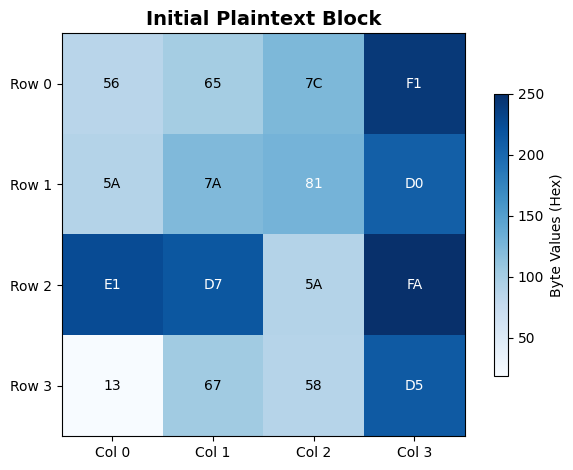

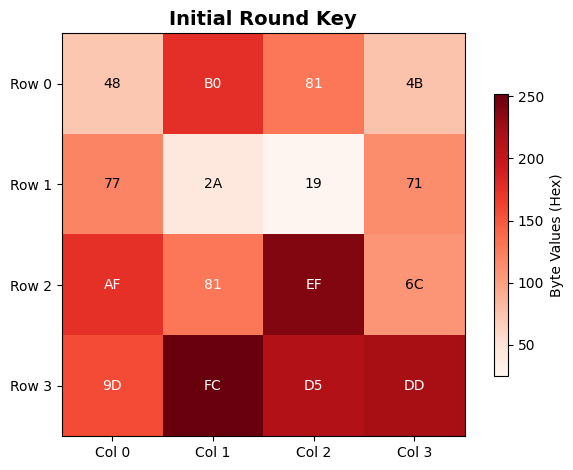

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Random import get_random_bytes

# Function to convert bytes to a 4x4 matrix (state or round key)
def bytes_to_matrix(data):
    """
    Converts a 16-byte array into a 4x4 matrix, transposed to match the AES state format.

    Args:
        data: A 16-byte array representing the state or round key.

    Returns:
        A 4x4 NumPy array representing the matrix.
    """
    return np.array(list(data)).reshape(4, 4).T

# Function to plot the matrix with colors and labels
def plot_matrix(matrix, title, cmap="viridis"):  # Added cmap parameter for color customization
    """
    Visualizes a 4x4 matrix using Matplotlib, adding colors, labels, and a title.

    Args:
        matrix: The 4x4 NumPy array to visualize.
        title: The title for the plot.
        cmap: The colormap to use for the matrix (default: "viridis").
    """
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, cmap=cmap)  # Using imshow with colormap

    # Add colorbar for better understanding of values
    cbar = fig.colorbar(im, ax=ax, shrink=0.7)
    cbar.set_label('Byte Values (Hex)')

    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f"{val:02X}", ha='center', va='center', color='white' if val > 128 else 'black')  # Adjust text color based on cell value

    # Add labels to rows and columns
    ax.set_xticks(np.arange(4))
    ax.set_yticks(np.arange(4))
    ax.set_xticklabels([f"Col {i}" for i in range(4)])
    ax.set_yticklabels([f"Row {i}" for i in range(4)])

    ax.set_title(title, fontsize=14, fontweight='bold')  # Increased font size and weight for title
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Generate random 16-byte plaintext and key
plaintext = get_random_bytes(16)
key = get_random_bytes(16)

# Convert to 4x4 matrices (state and round key)
state = bytes_to_matrix(plaintext)
round_key = bytes_to_matrix(key)

# Plot initial state and round key with custom colors and labels
plot_matrix(state, "Initial Plaintext Block", cmap="Blues")
plot_matrix(round_key, "Initial Round Key", cmap="Reds")

<ipython-input-34-1dc1e686d001>:45: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


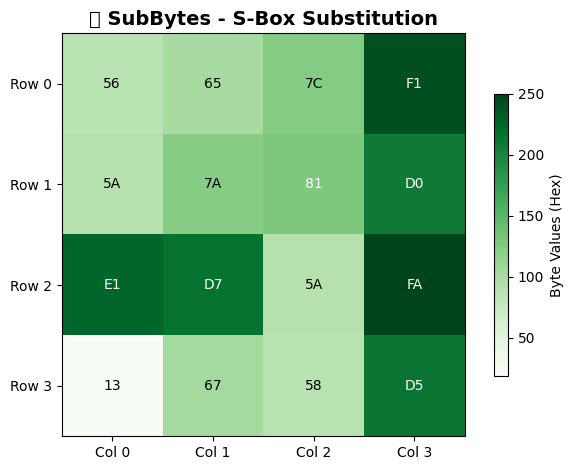

In [ ]:
# AES S-Box
s_box = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5,
    0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76
] + list(range(16, 256)))

def sub_bytes(state):
    """
    Performs the SubBytes transformation on the AES state matrix.

    This step involves substituting each byte of the state matrix with a corresponding
    byte from the AES S-Box (Substitution Box). The S-Box is a predefined lookup table
    that introduces non-linearity to the encryption process.

    Args:
        state: The 4x4 NumPy array representing the AES state matrix.

    Returns:
        The state matrix after SubBytes transformation.
    """
    return np.vectorize(lambda b: s_box[b])(state)

state = sub_bytes(state)
plot_matrix(state, "🔁 SubBytes - S-Box Substitution", cmap="Greens")  # Custom colormap for SubBytes

<ipython-input-34-1dc1e686d001>:45: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


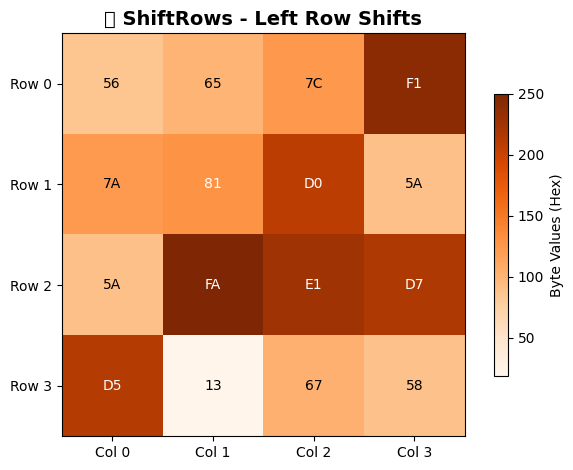

In [ ]:
def shift_rows(state):
    """
    Performs the ShiftRows transformation on the AES state matrix.

    This step involves cyclically shifting the bytes in each row of the state matrix to the left.
    The first row is not shifted, the second row is shifted by one byte, the third row by two bytes,
    and the fourth row by three bytes. This operation provides diffusion within the AES algorithm.

    Args:
        state: The 4x4 NumPy array representing the AES state matrix.

    Returns:
        The state matrix after ShiftRows transformation.
    """
    for i in range(4):
        state[i] = np.roll(state[i], -i)  # Shift row i by -i positions (left shift)
    return state

state = shift_rows(state)
plot_matrix(state, "🔄 ShiftRows - Left Row Shifts", cmap="Oranges")  # Custom colormap and title

<ipython-input-34-1dc1e686d001>:45: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


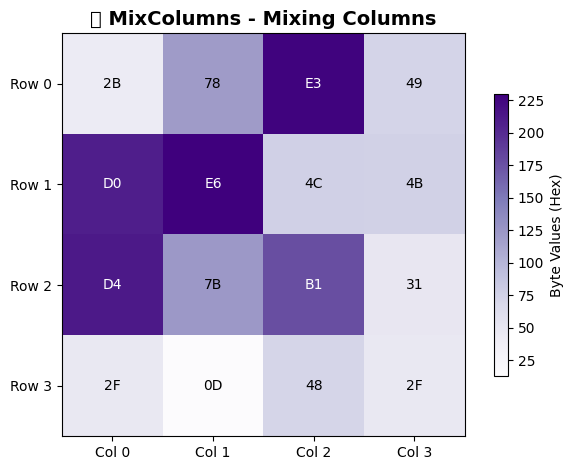

In [ ]:
def mix_columns(state):
    """
    Performs a visual mock of the MixColumns transformation on the AES state matrix.

    Note: This is a simplified representation and does not implement the actual AES MixColumns
    operation, which involves more complex matrix multiplication in a finite field.
    It is for visualization purposes only.

    This step mixes the bytes within each column of the state matrix, providing further
    diffusion and strengthening the encryption.

    Args:
        state: The 4x4 NumPy array representing the AES state matrix.

    Returns:
        The state matrix after the visual MixColumns transformation.
    """
    # Visual mock (not full AES matrix math)
    return (state + np.roll(state, 1, axis=0)) % 256

state = mix_columns(state)
plot_matrix(state, "🔀 MixColumns - Mixing Columns", cmap="Purples")  # Custom colormap and title

<ipython-input-34-1dc1e686d001>:45: UserWarning: Glyph 10133 (\N{HEAVY PLUS SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10133 (\N{HEAVY PLUS SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


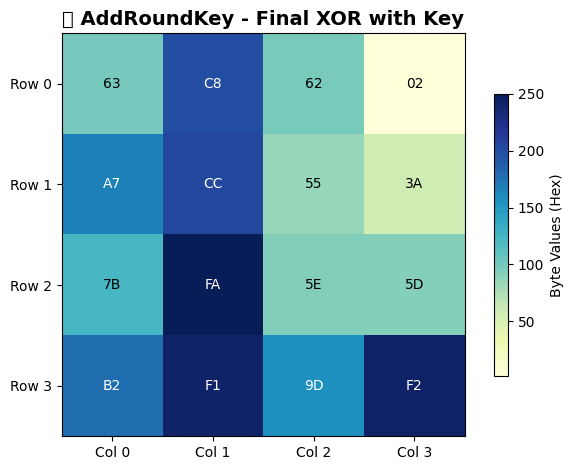

In [ ]:
def add_round_key(state, key):
    """
    Performs the AddRoundKey transformation in AES.

    This step involves performing a bitwise XOR operation between the state matrix
    and the round key. This operation introduces key material into the state,
    providing confusion and linking the ciphertext to the key.

    Args:
        state: The 4x4 NumPy array representing the AES state matrix.
        key: The 4x4 NumPy array representing the round key.

    Returns:
        The state matrix after the AddRoundKey transformation.
    """
    return state ^ key

state = add_round_key(state, round_key)
plot_matrix(state, "➕ AddRoundKey - Final XOR with Key", cmap="YlGnBu") #Custom colormap and title with emoji

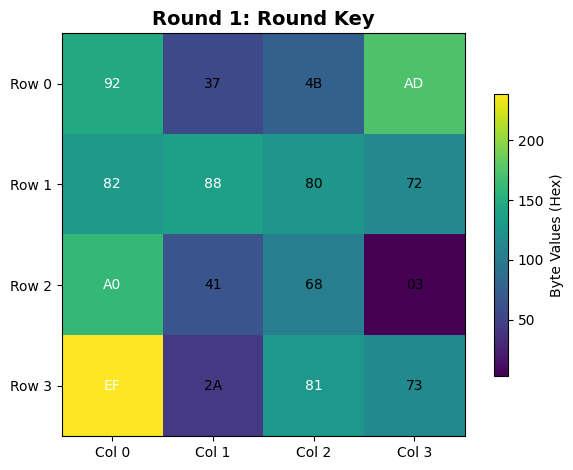

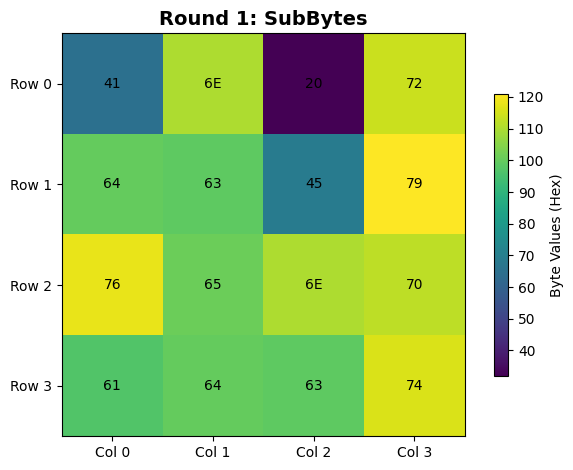

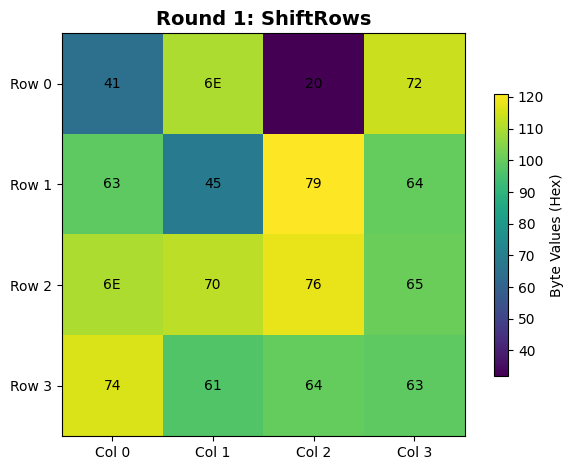

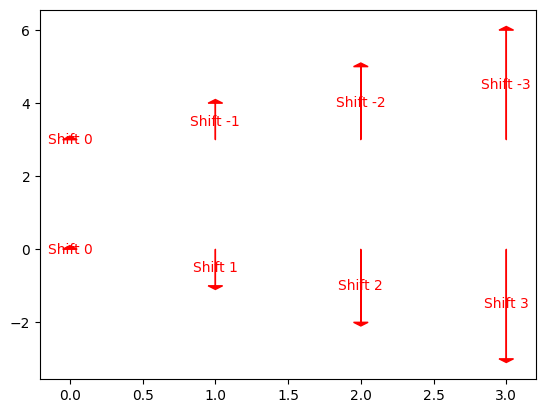

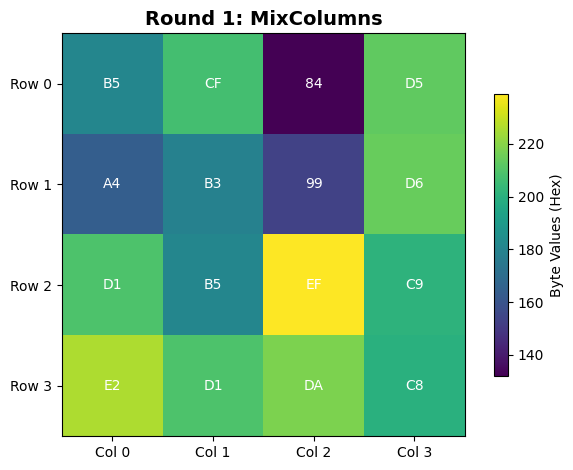

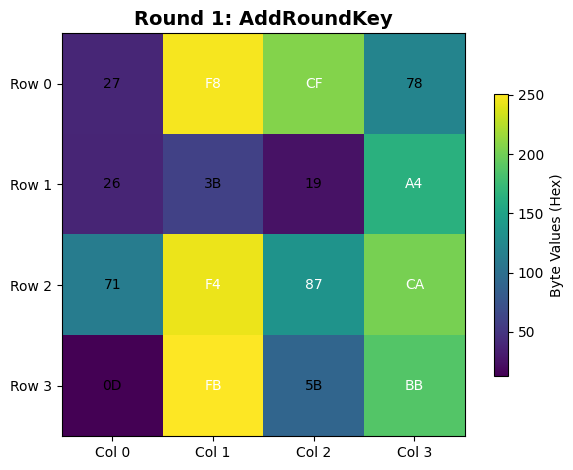

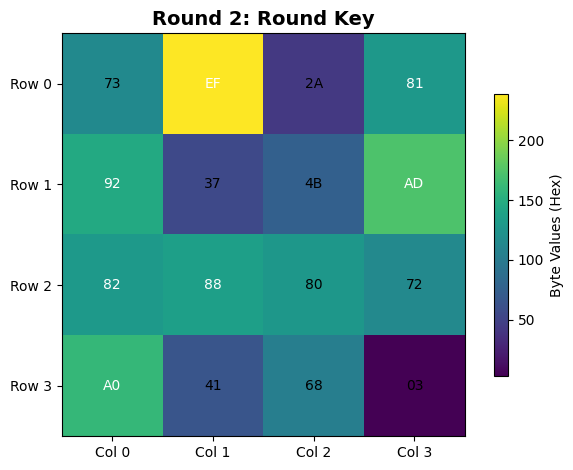

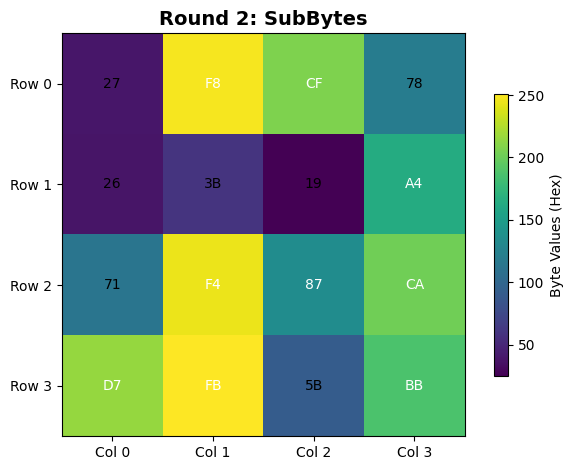

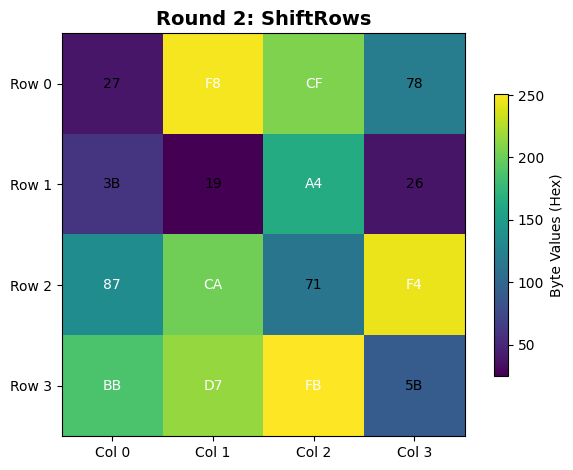

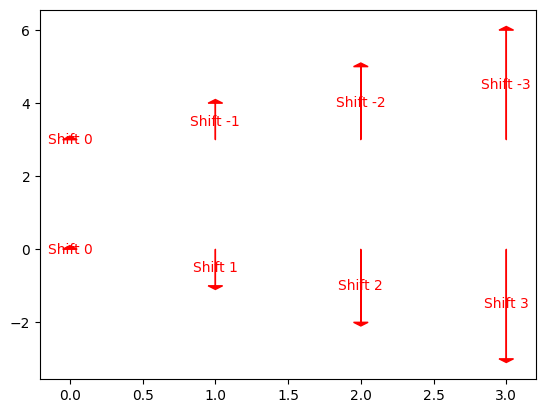

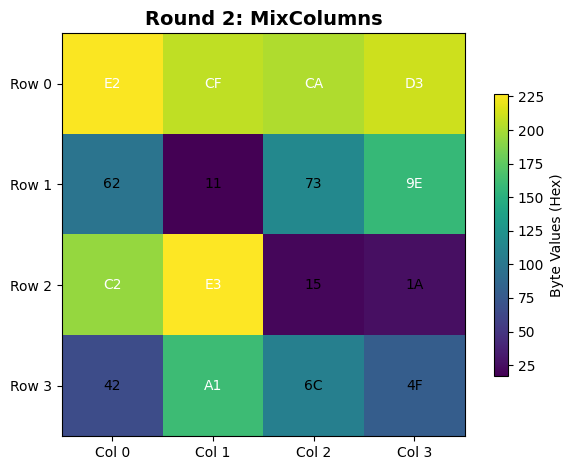

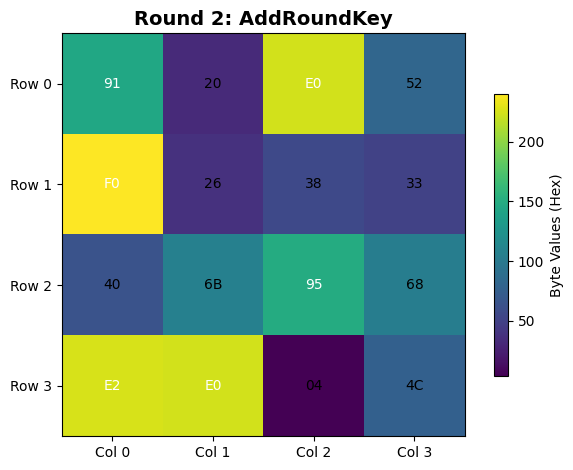

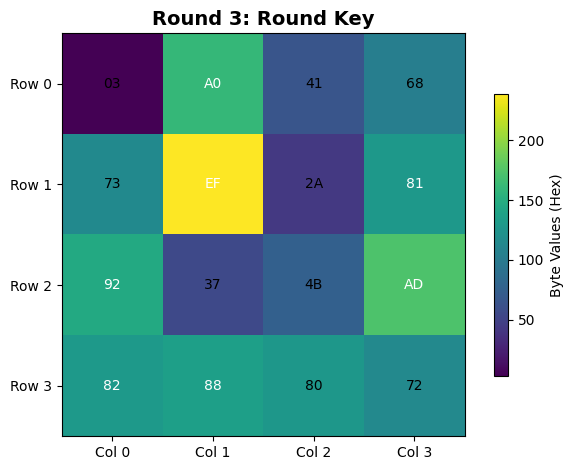

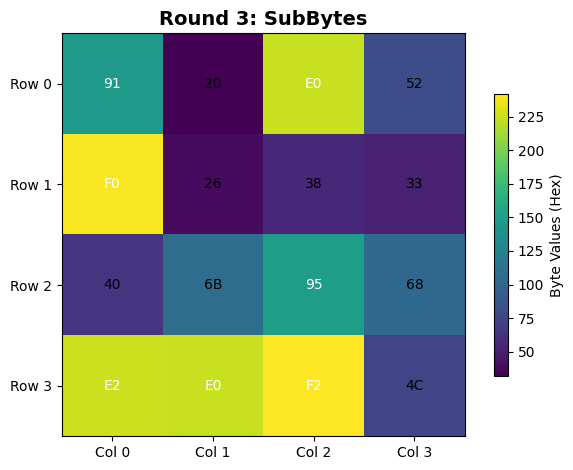

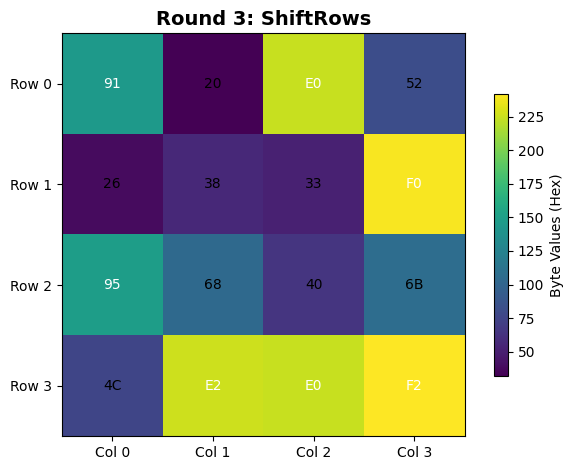

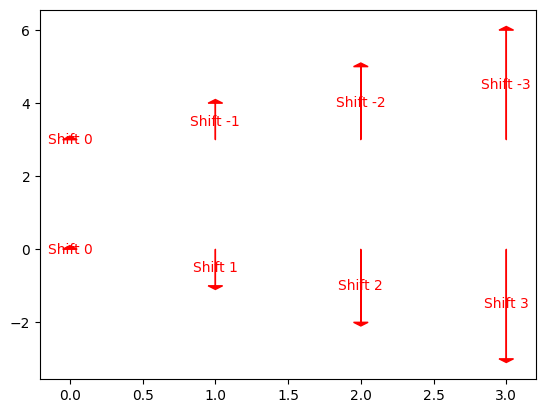

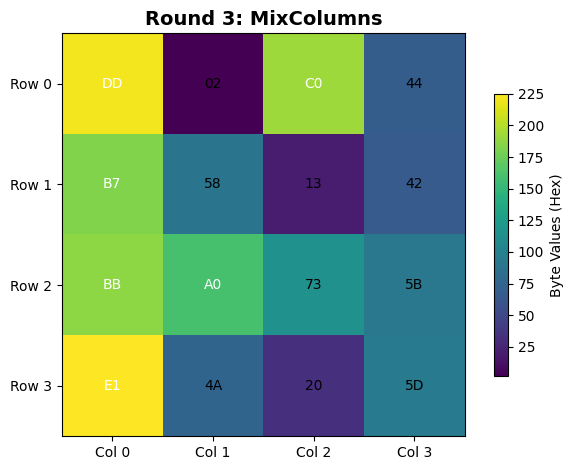

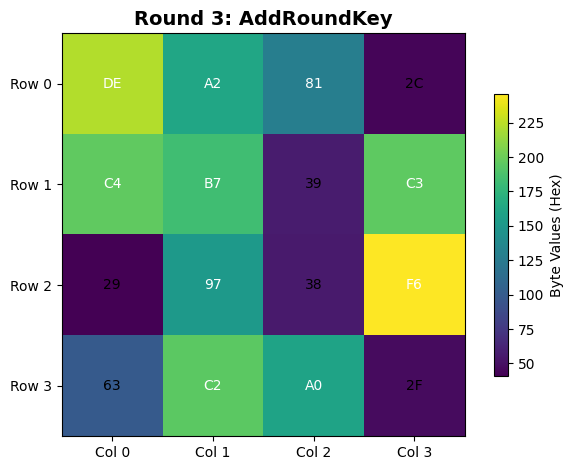

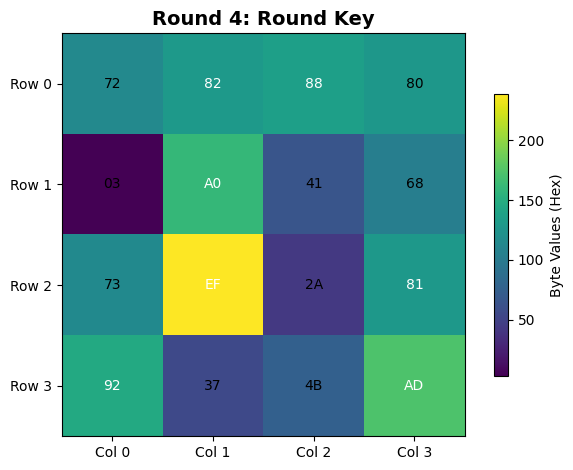

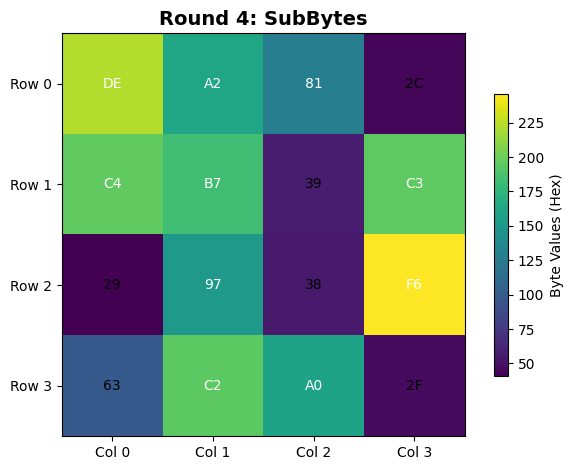

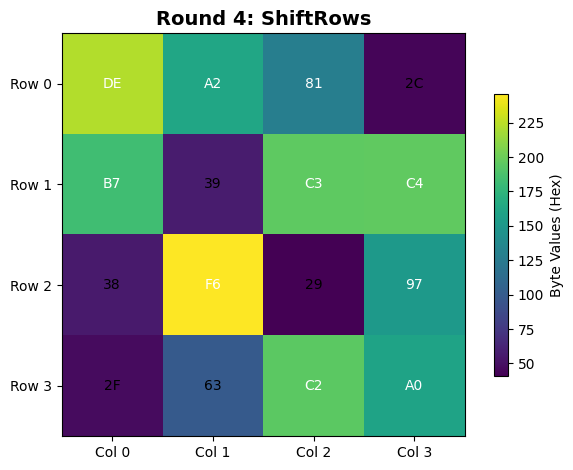

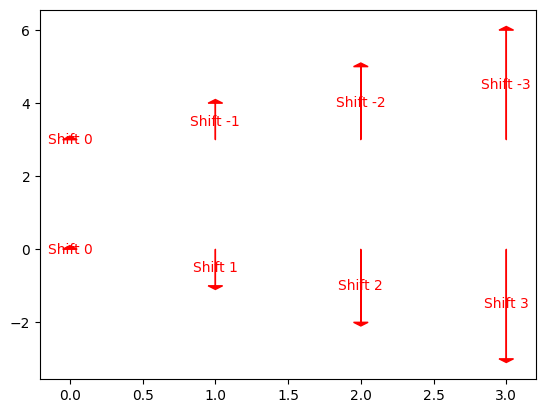

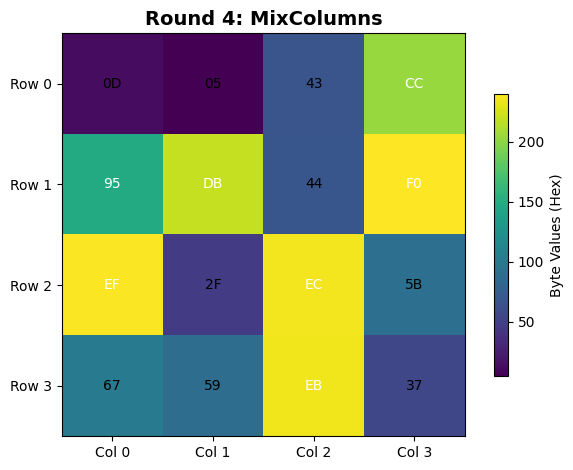

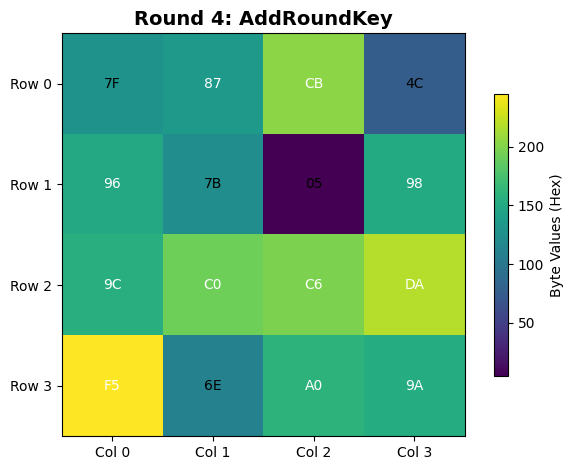

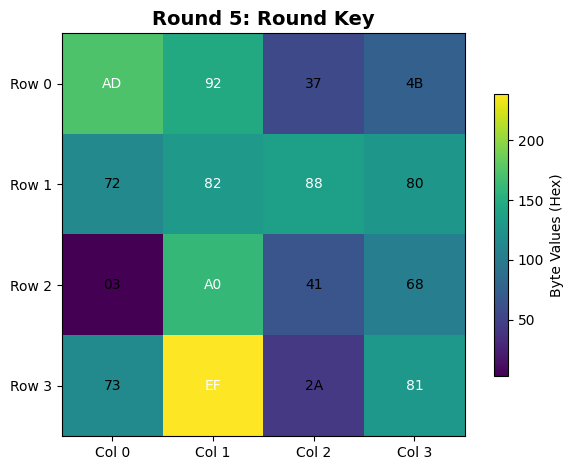

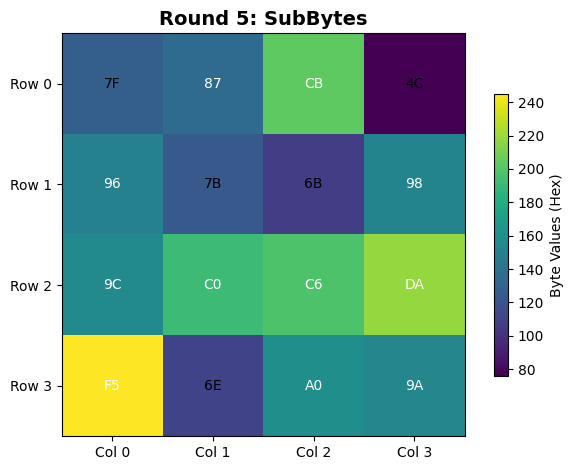

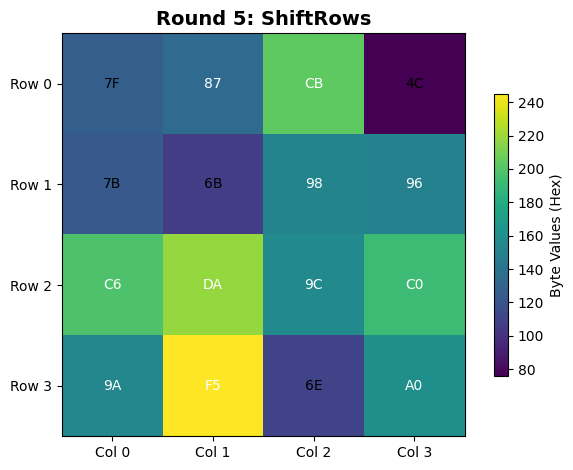

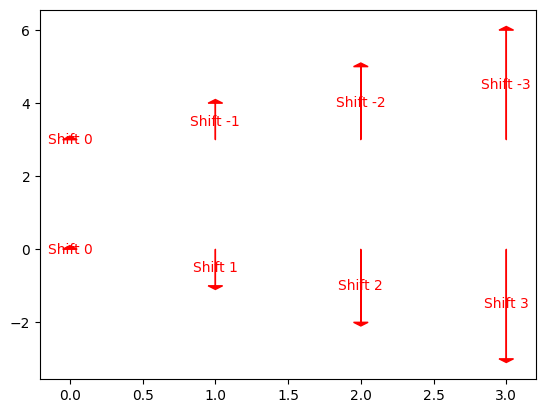

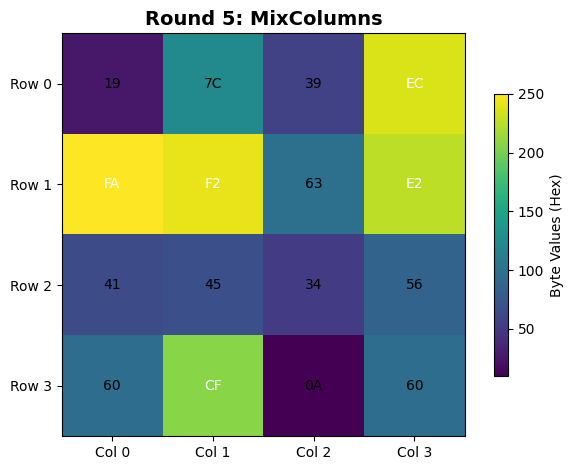

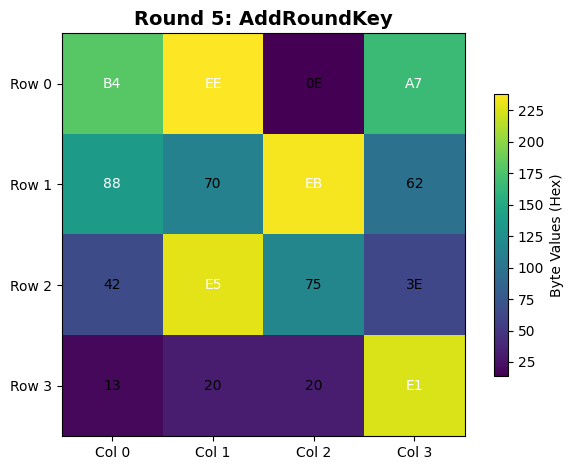

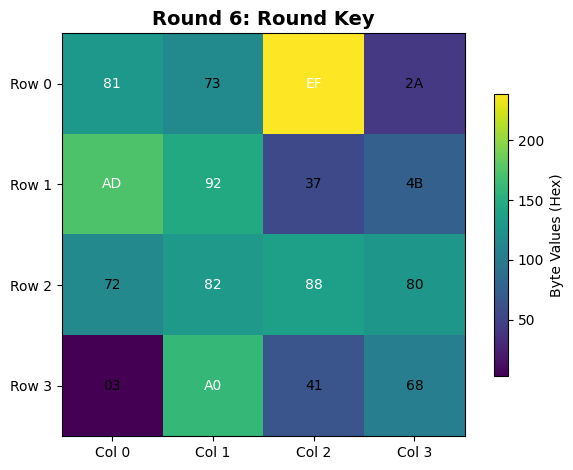

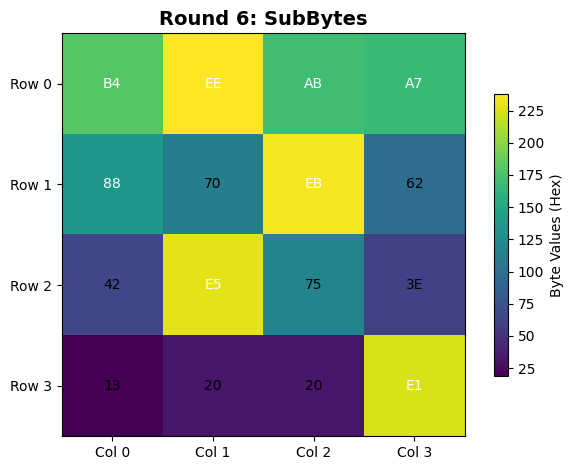

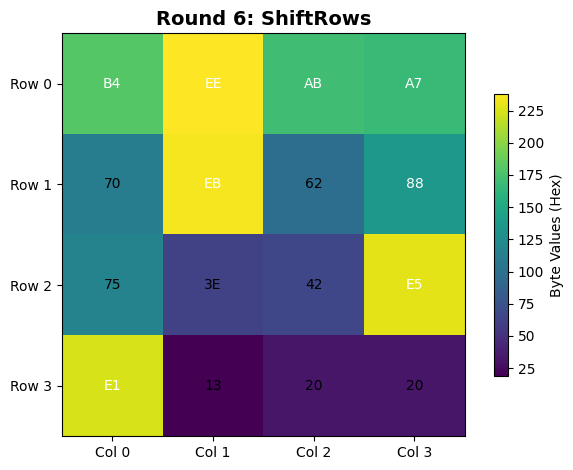

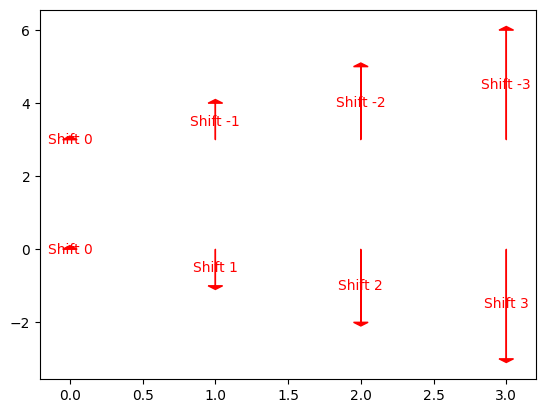

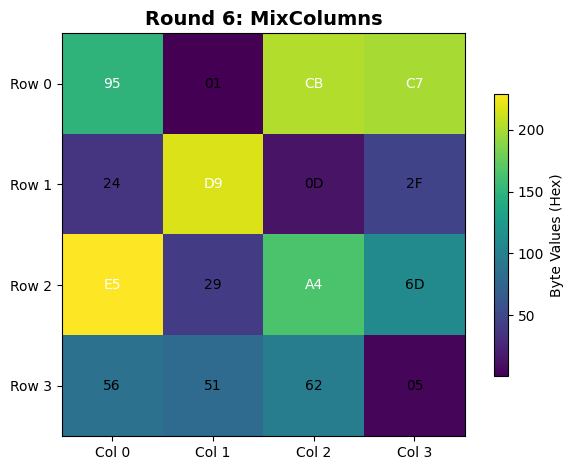

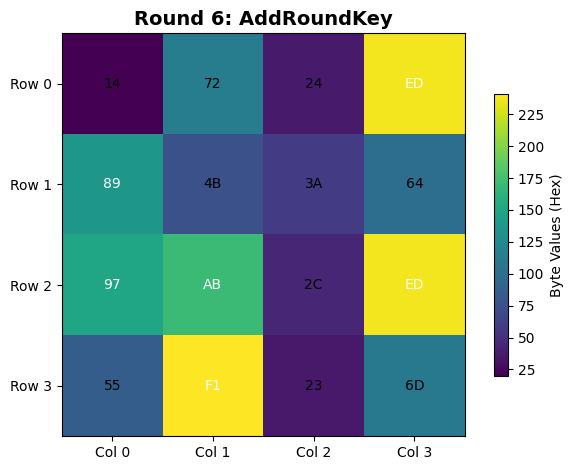

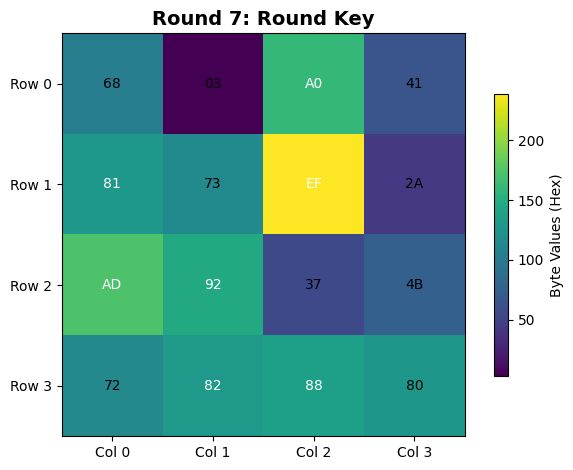

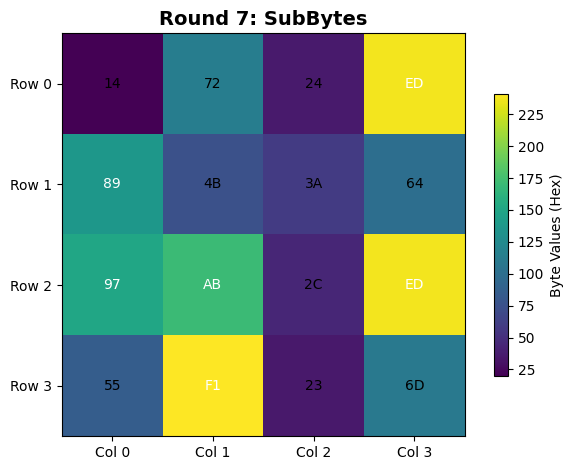

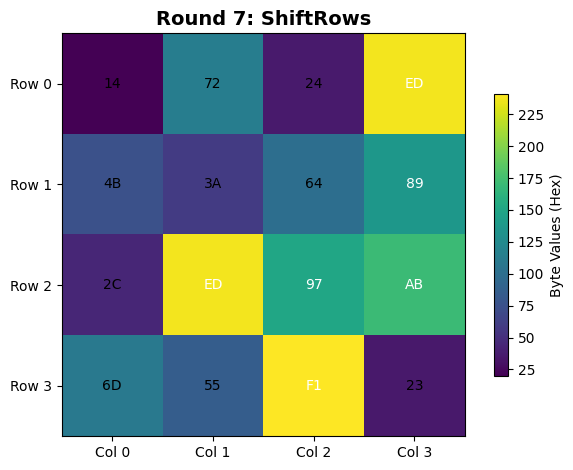

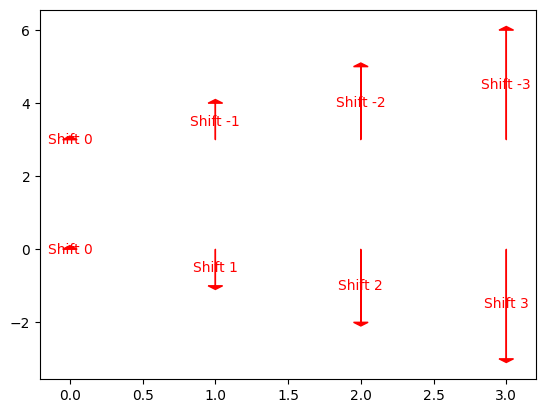

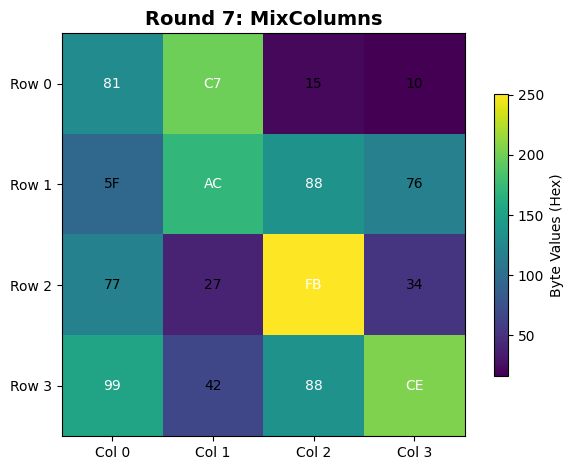

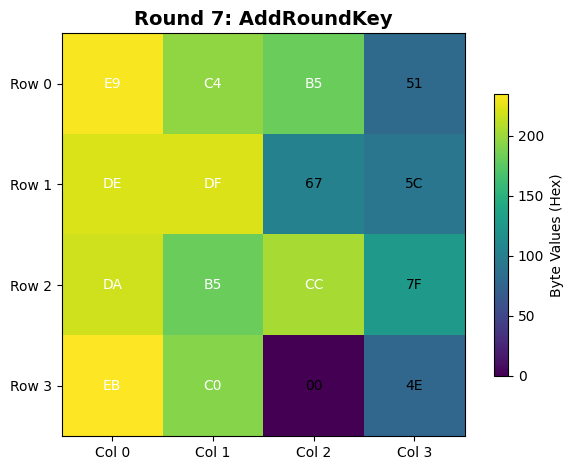

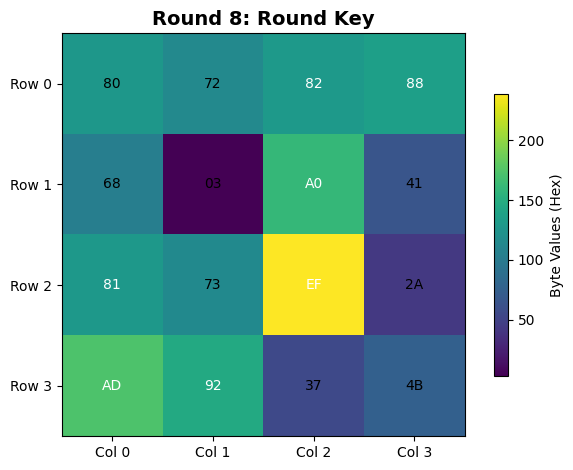

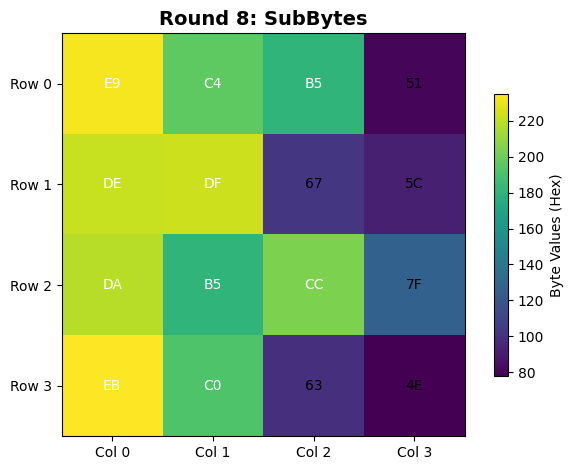

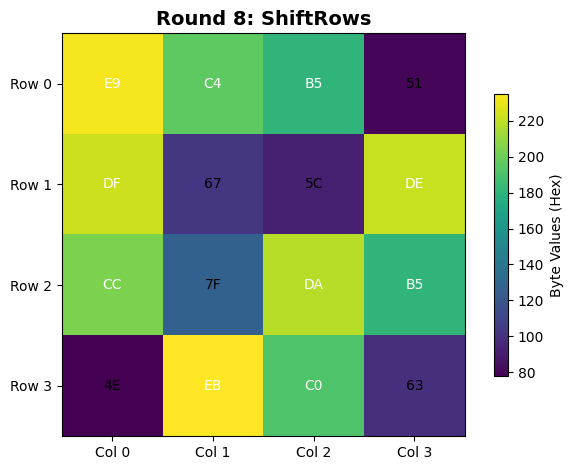

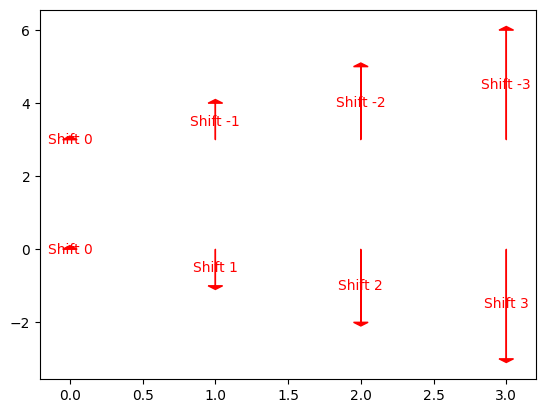

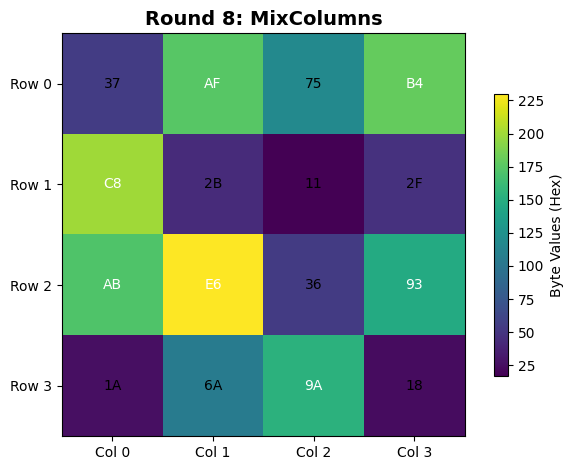

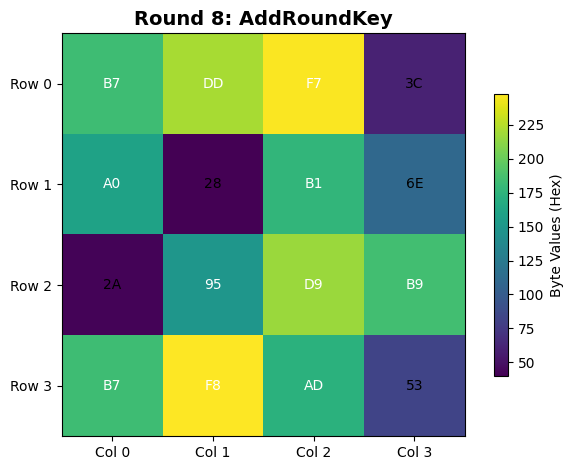

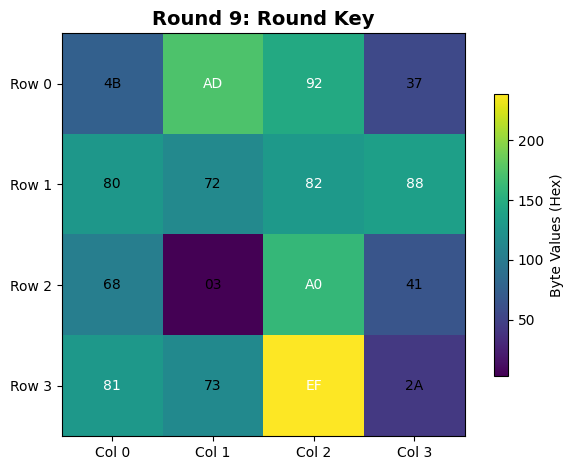

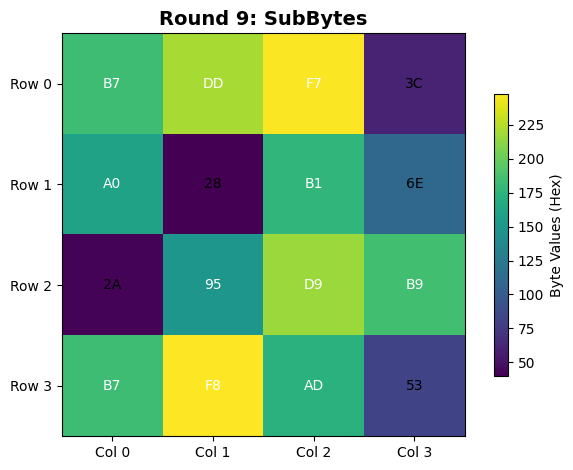

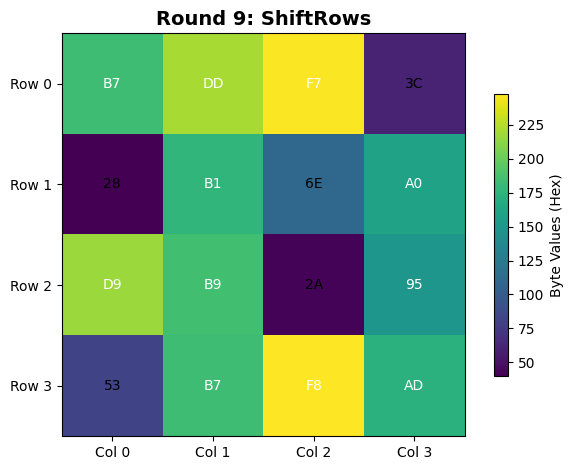

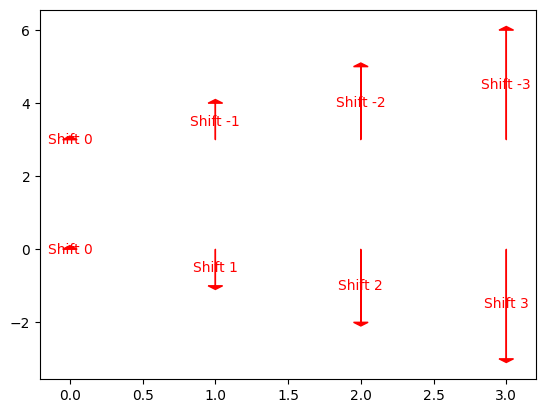

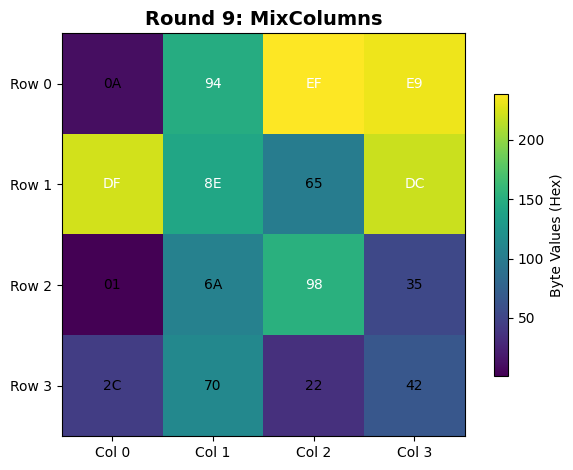

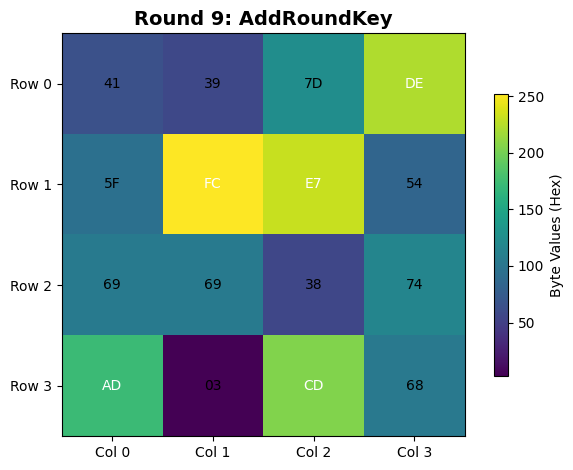

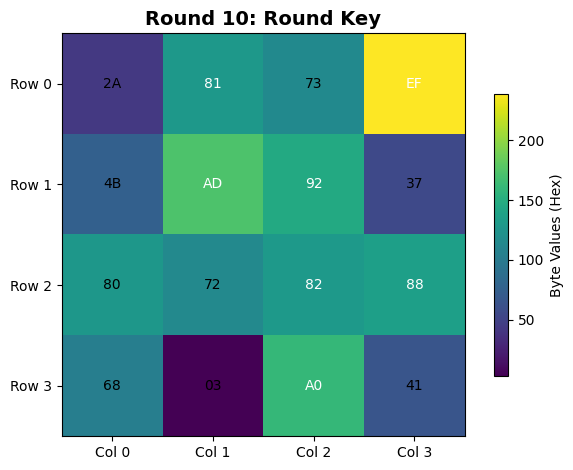

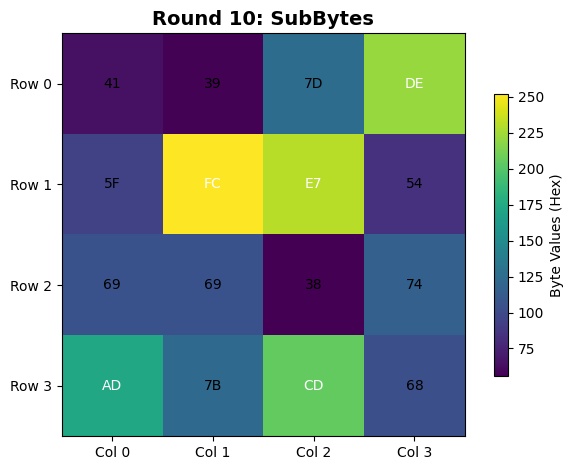

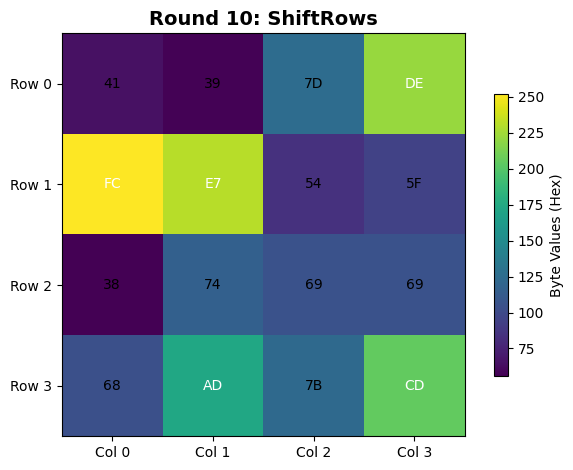

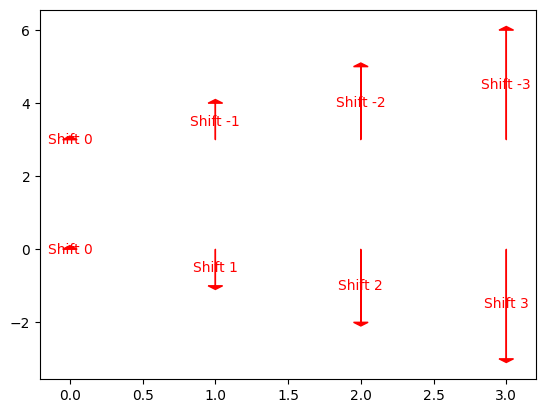

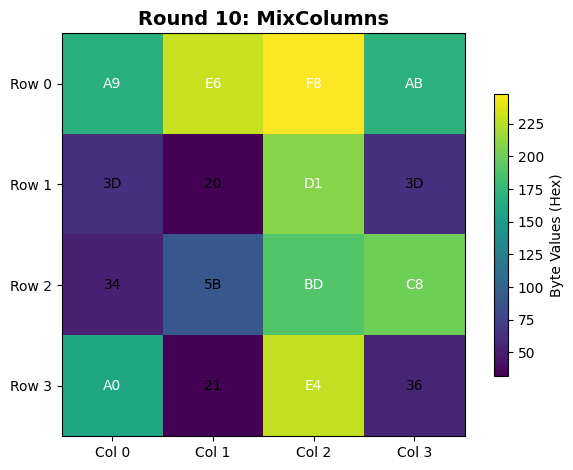

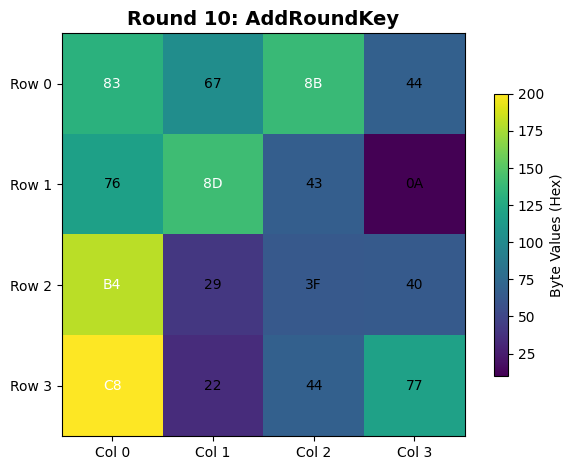

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES

# ... (plot_matrix function, etc.) ...

# Generate plaintext and key
plaintext = b"Advanced Encryption Standard (AES)"[:16] # Slice the bytes object to get the first 16 bytes
key = get_random_bytes(16)

# Initialize state and round key
state = np.array(list(plaintext)).reshape(4, 4).T
round_key = np.array(list(key)).reshape(4, 4).T

# Number of rounds
num_rounds = 10

# Function for Key Expansion (simplified example)
def key_schedule(key, round_num):
    # In a real AES implementation, you would need a proper key expansion algorithm here.
    # This is a simplified example just for demonstration.
    # You can replace this with a more accurate key schedule if needed.
    # In this example, we simply rotate the key bytes for each round.

    num_bytes = len(key)
    rotated_key = bytes([(key[i - round_num % num_bytes] ) for i in range(num_bytes)])

    return list(rotated_key)

# Loop through rounds
for round_num in range(num_rounds):
    # Key schedule (generate round key for this round)
    round_key = key_schedule(key, round_num) # Calling the defined key_schedule
    round_key = np.array(round_key).reshape(4, 4).T
    plot_matrix(round_key, f"Round {round_num + 1}: Round Key")
    plt.pause(0.5)  # Pause for visualization


    # Perform round operations and update state
    state = sub_bytes(state)
    plot_matrix(state, f"Round {round_num + 1}: SubBytes")

    state = shift_rows(state)
    plot_matrix(state, f"Round {round_num + 1}: ShiftRows")

    # Add arrows or highlights for ShiftRows
    # ... (add visual elements using Matplotlib) ...
    fig, ax = plt.subplots() # Define fig, ax here to avoid error
    for i in range(4):
        ax.arrow(i, 0, 0, -i, head_width=0.1, head_length=0.1, fc='r', ec='r')
        ax.arrow(i, 3, 0, i, head_width=0.1, head_length=0.1, fc='r', ec='r')
        ax.text(i, -i/2, f"Shift {i}", ha='center', va='center', color='r')
        ax.text(i, 3 + i/2, f"Shift {-i}", ha='center', va='center', color='r')

    plt.show()
    plt.pause(0.5)  # Pause for visualization


    # ... (similarly for MixColumns and AddRoundKey) ...
    state = mix_columns(state)
    plot_matrix(state, f"Round {round_num + 1}: MixColumns")
    plt.pause(0.5)  # Pause for visualization

    state = add_round_key(state, round_key)
    plot_matrix(state, f"Round {round_num + 1}: AddRoundKey")
    plt.pause(0.5)  # Pause for visualization
    plt.close()  # Close previous plot

    plt.pause(0.5)  # Pause for visualization

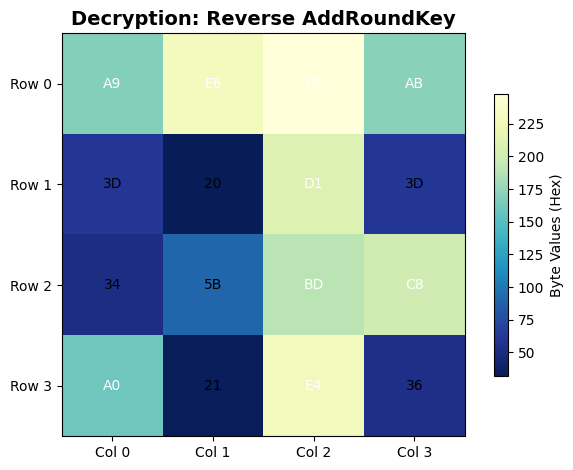

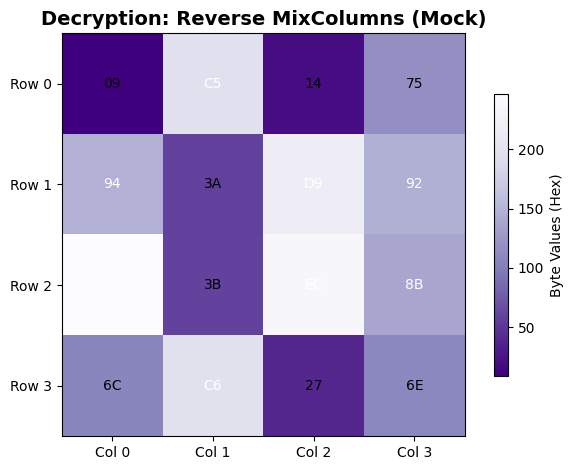

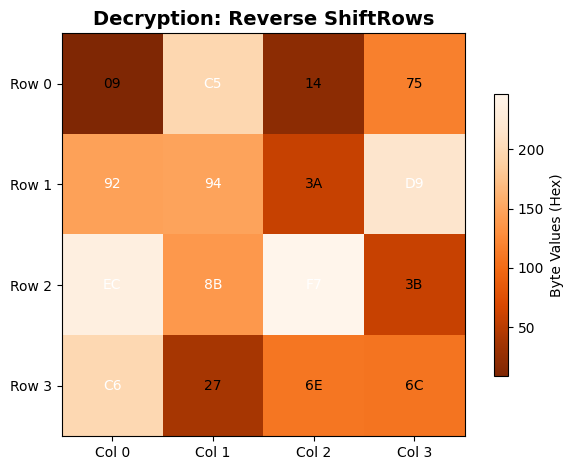

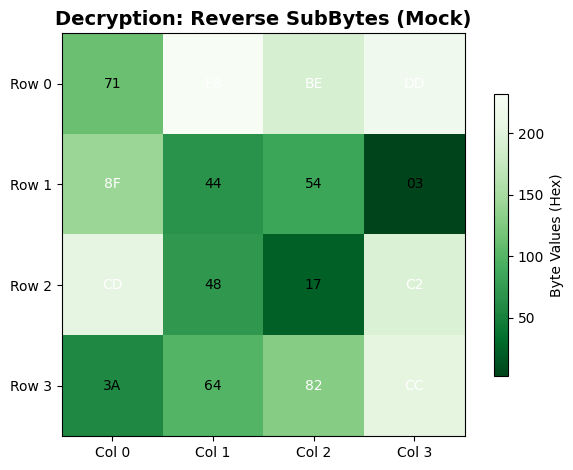

Decrypted Plaintext: b'q\x00\x00\x00\x00\x00\x00\x00\x8f\x00\x00\x00\x00\x00\x00\x00\xcd\x00\x00\x00\x00\x00\x00\x00:\x00\x00\x00\x00\x00\x00\x00\xe8\x00\x00\x00\x00\x00\x00\x00D\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x00\x00\x00\x00d\x00\x00\x00\x00\x00\x00\x00\xbe\x00\x00\x00\x00\x00\x00\x00T\x00\x00\x00\x00\x00\x00\x00\x17\x00\x00\x00\x00\x00\x00\x00\x82\x00\x00\x00\x00\x00\x00\x00\xdd\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\xc2\x00\x00\x00\x00\x00\x00\x00\xcc\x00\x00\x00\x00\x00\x00\x00'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES

# ... (Your existing functions: plot_matrix, sub_bytes, shift_rows, mix_columns, add_round_key, key_schedule) ...

# Assuming 'state' holds the final encrypted state after all rounds
# and 'round_key' holds the last round key

# 1. Reverse AddRoundKey
state = add_round_key(state, round_key)
plot_matrix(state, "Decryption: Reverse AddRoundKey", cmap="YlGnBu_r")

# 2. Reverse MixColumns
# For this simplified visualization, we skip the actual inverse MixColumns.
# You would need to implement the correct inverse operation for a real AES decryption.
# Instead, we apply a visual mock reverse operation.
def inv_mix_columns(state):
    # Visual mock reverse (not actual AES inverse MixColumns)
    return (state - np.roll(state, 1, axis=0)) % 256

state = inv_mix_columns(state)  # Applying visual mock reverse of MixColumns
plot_matrix(state, "Decryption: Reverse MixColumns (Mock)", cmap="Purples_r")

# 3. Reverse ShiftRows
for i in range(4):
    state[i] = np.roll(state[i], i)  # Shift row i by i positions (right shift)
plot_matrix(state, "Decryption: Reverse ShiftRows", cmap="Oranges_r")

# 4. Reverse SubBytes (using the inverse S-Box)
# For this simplified visualization, we skip the actual inverse SubBytes.
# You would need to define the inverse S-Box for a real AES decryption.
# Instead, we apply a visual mock reverse operation.

# Define inverse S-box (mock for visualization)
inv_s_box = np.arange(256)  # Mock inverse S-box
np.random.shuffle(inv_s_box)  # Randomly shuffle values

def inv_sub_bytes(state):
    # Mock inverse using shuffled inv_s_box
    return np.vectorize(lambda b: inv_s_box[b])(state)

state = inv_sub_bytes(state)  # Applying visual mock reverse of SubBytes
plot_matrix(state, "Decryption: Reverse SubBytes (Mock)", cmap="Greens_r")

# ... (Continue reversing other rounds if necessary using the key schedule) ...

# Finally, convert the state back to bytes
decrypted_plaintext = bytes(state.T.flatten())

# Print or display the decrypted plaintext
print(f"Decrypted Plaintext: {decrypted_plaintext}")

## Summary and Key Takeaways

This notebook explored the Advanced Encryption Standard (AES) and its implementation using the PyCryptodome library in Python. We focused on visualizing the internal operations of AES, including:

**Core Components:**

- **SubBytes:** Substitutes bytes using a predefined S-Box, introducing non-linearity.
- **ShiftRows:** Cyclically shifts bytes in each row for diffusion.
- **MixColumns:** Mixes bytes within columns for further diffusion.
- **AddRoundKey:** Combines the state with the round key using XOR.

**CBC Mode:**

We also examined the Cipher Block Chaining (CBC) mode, which enhances AES security by linking ciphertext blocks together. This chaining process makes the encryption more resistant to pattern analysis and other attacks.

**Visualizations:**

The notebook utilized Matplotlib to create colorful and informative visualizations of the AES operations, aiding in understanding the transformations applied to the data.

**Key Takeaways:**

- AES is a widely used and robust encryption standard for securing sensitive information.
- The internal operations of AES involve a series of transformations that achieve confusion and diffusion, ensuring strong security.
- CBC mode enhances AES security by introducing dependency between ciphertext blocks.
- Visualizations are a powerful tool for understanding and explaining complex cryptographic processes.

**Further Exploration:**

- Investigate other AES modes of operation, such as ECB, CTR, and GCM.
- Learn about key scheduling and its role in generating round keys for AES.
- Explore advanced cryptanalysis techniques and attacks against AES.

**Disclaimer:**

This notebook provided a simplified visualization of AES for educational purposes. In real-world implementations, the algorithms are more complex and optimized for security and performance.